In [1]:
import re
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# источник: https://library.keldysh.ru/preprint.asp?id=2010-28

# сняты данные с датчика:
# 1) охлажденного до минусовой температуры и в процессе установления комнатной
# 2) вращающегося на поворотном столе вокруг трёх взаимно перпендикулярных осей
# 3) покоящегося при комнатной температуре

# не удалось реализовать метод из источника, т.к. не могу понять, как определить чувствительные
# оси датчика, нужны дополнительные эксперименты (трудно придумать и реализовать в сжатые сроки)

In [3]:
# считываем собранные с датчика данные из файла

all_lines = []
with open('data/gyroscope/data_no_ofs/gyro_zero_ofs.txt', "r") as f:
    all_lines = f.readlines() # readlines() возвращает список строк файла
N = 13000 # кол-во точек, которые будем использовать
data_lines = []
for i in range(1, N + 1):
    data_lines.append(re.split('\s+', all_lines[i]))
    data_lines[i - 1] = data_lines[i - 1][:-1]
    #print(data_lines[i - 1])

<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_4857/1889675062.py:9: SyntaxWarning: invalid escape sequence '\s'
  data_lines.append(re.split('\s+', all_lines[i]))


In [4]:
# преобразуем данные к типу float

points = []
for i in range(N):
    points.append(list(float(value) for value in data_lines[i]))

points = np.array(points)
print(points)

[[  64.  177. -206.]
 [  55.  180. -209.]
 [  52.  183. -202.]
 ...
 [  78.  166. -190.]
 [  76.  175. -182.]
 [  86.  157. -187.]]


Text(0.5, 0, 't, сек')

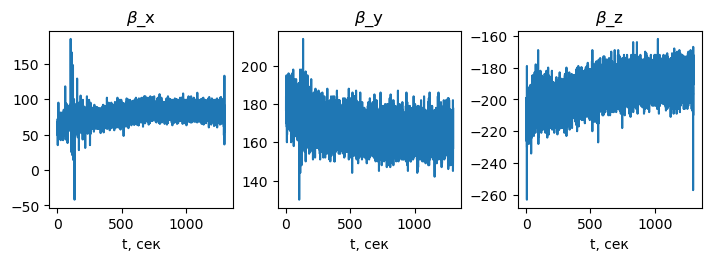

In [5]:
x = points[:, 0]
y = points[:, 1]
z = points[:, 2]

t = np.arange(0, 1300, 0.1)

fig, axs = plt.subplots(ncols=3, figsize=(7, 2.5), layout='constrained')

axs[0].plot(t, x)
axs[0].set_title(r'$\beta$_x')
axs[0].set_xlabel('t, сек')

axs[1].plot(t, y)
axs[1].set_title(r'$\beta$_y')
axs[1].set_xlabel('t, сек')

axs[2].plot(t, z)
axs[2].set_title(r'$\beta$_z')
axs[2].set_xlabel('t, сек')

In [6]:
# для уменьшения шума измерений выходные данные необходимо обработать с помощью фильтра Калмана

In [7]:
all_lines = []
with open('data/gyroscope/data_no_ofs/temperature.txt', "r") as f:
    all_lines = f.readlines() # readlines() возвращает список строк файла
N = 26000
data_lines = []
for i in range(1, N, 2):
    data_lines.append(all_lines[i][:-1])

#print(data_lines)

In [8]:
temp = []
N = 13000
for i in range(N):
    temp.append(float(data_lines[i]))

temp = np.array(temp)
print(temp)

[ 7.  7.  7. ... 26. 26. 26.]


Text(0, 0.5, 't, $\\circ$c')

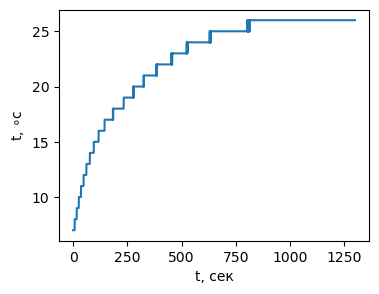

In [9]:
# изменение температуры датчика со временем

fig, ax = plt.subplots(figsize=(4, 3))

lines = ax.plot(t, temp)
ax.set_xlabel('t, сек')
ax.set_ylabel(r't, $\circ$c')

Text(0.5, 0, 't, $\\circ$c')

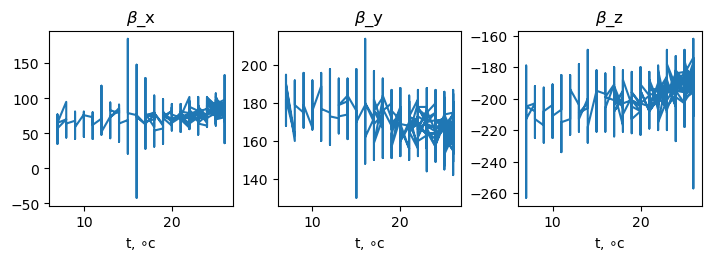

In [10]:
fig, axs = plt.subplots(ncols=3, figsize=(7, 2.5), layout='constrained')

axs[0].plot(temp, x)
axs[0].set_title(r'$\beta$_x')
axs[0].set_xlabel(r't, $\circ$c')

axs[1].plot(temp, y)
axs[1].set_title(r'$\beta$_y')
axs[1].set_xlabel(r't, $\circ$c')

axs[2].plot(temp, z)
axs[2].set_title(r'$\beta$_z')
axs[2].set_xlabel(r't, $\circ$c')

# если убрать шумы фильтром и аппроксимировать данные графики прямыми, то получим зависимость коэффициента смещения нуля от температуры

Text(0.5, 0, 't, $\\circ$c')

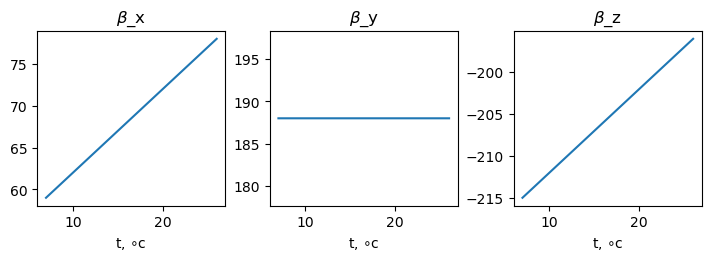

In [11]:
# но можно попробовать аппроксимировать и так, без фильтра

def mapping(x, a, b): 
    return a * x + b 
    
popt = np.array([[0, 0], [0, 0], [0, 0]])
a = np.zeros(3)
b = np.zeros(3)
new = np.zeros((3, N))

for i in range(3):
    popt[i], _ = curve_fit(mapping, temp, points[:, i])
    a[i], b[i] = popt[i]
    new[i] = mapping(temp, a[i], b[i])

fig, axs = plt.subplots(ncols=3, figsize=(7, 2.5), layout='constrained')

axs[0].plot(temp, new[0])
axs[0].set_title(r'$\beta$_x')
axs[0].set_xlabel(r't, $\circ$c')

axs[1].plot(temp, new[1])
axs[1].set_title(r'$\beta$_y')
axs[1].set_xlabel(r't, $\circ$c')

axs[2].plot(temp, new[2])
axs[2].set_title(r'$\beta$_z')
axs[2].set_xlabel(r't, $\circ$c')

In [12]:
# если теперь возьмём смещение нуля при комнатной температуре, то это будет точка на прямой при 26 градусах
# сделаем это для каждой из осей 
gyroscope_zero_ofs = [new[0][N - 4000], new[1][N - 4000], new[2][N - 4000]]
print(gyroscope_zero_ofs)

[78.0, 188.0, -196.0]


In [13]:
# кроме того, были сняты выходные значения датчика в состоянии покоя

all_lines = []
with open('data/gyroscope/data_no_ofs/gyro_no_movement.txt', "r") as f:
    all_lines = f.readlines() # readlines() возвращает список строк файла
N = 1200 # кол-во точек, которые будем использовать
data_lines = []
for i in range(1, N + 1):
    data_lines.append(re.split('\s+', all_lines[i]))
    data_lines[i - 1] = data_lines[i - 1][:-1]
    #print(data_lines[i - 1])

<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_4857/3639538163.py:9: SyntaxWarning: invalid escape sequence '\s'
  data_lines.append(re.split('\s+', all_lines[i]))


In [14]:
# преобразуем данные к типу float

points = []
for i in range(N):
    points.append(list(float(value) for value in data_lines[i]))

points = np.array(points)
print(points)

[[  85.  169. -192.]
 [  94.  182. -192.]
 [  96.  177. -193.]
 ...
 [  94.  174. -183.]
 [  91.  169. -192.]
 [  95.  177. -189.]]


In [15]:
# найдём среднее значение по каждой из чувствительных осей датчика

average_ofs = np.zeros(3)

x = points[:, 0]
y = points[:, 1]
z = points[:, 2]

average_ofs[0] = np.sum(x)/N
average_ofs[1] = np.sum(y)/N
average_ofs[2] = np.sum(z)/N

print(average_ofs)

[  91.71083333  169.22166667 -186.10333333]


In [16]:
print(points - average_ofs)

[[-6.71083333 -0.22166667 -5.89666667]
 [ 2.28916667 12.77833333 -5.89666667]
 [ 4.28916667  7.77833333 -6.89666667]
 ...
 [ 2.28916667  4.77833333  3.10333333]
 [-0.71083333 -0.22166667 -5.89666667]
 [ 3.28916667  7.77833333 -2.89666667]]


In [17]:
all_lines = []
with open('data/gyroscope/data_no_ofs/gyro_z.txt', "r") as f:
    all_lines = f.readlines() # readlines() возвращает список строк файла
N = 600 # кол-во точек, которые будем использовать
data_lines = []
for i in range(1, N + 1):
    data_lines.append(re.split('\s+', all_lines[i]))
    data_lines[i - 1] = data_lines[i - 1][:-1]
    #print(data_lines[i - 1])

points = []
for i in range(N):
    points.append(list(float(value) for value in data_lines[i]))

points = np.array(points)
#print(points)

new_points = points - average_ofs - gyroscope_zero_ofs
print(new_points)

[[ -4140.71083333    171.77833333 -32385.89666667]
 [ -4254.71083333    165.77833333 -32385.89666667]
 [ -4157.71083333    125.77833333 -32385.89666667]
 ...
 [ -3887.71083333    230.77833333 -32385.89666667]
 [ -3832.71083333    146.77833333 -32385.89666667]
 [ -3662.71083333    132.77833333 -32385.89666667]]


<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_4857/3396347937.py:7: SyntaxWarning: invalid escape sequence '\s'
  data_lines.append(re.split('\s+', all_lines[i]))
